
# <span style="color:rgb(213,80,0)">Purging unactivated nodes after training SOM on Iris plants dataset</span>

## Dataset and preparation

In [1]:
% setup
rng(0);
close all;
clear all;

In [2]:
% dataset

load fisheriris;

columns = {'SL', 'SW', 'PL', 'PW'};
predictors = meas;

target = species;
[target_labels, ~, target_encoded] = unique(target);

% data normalization
predictors_norm = normalize(predictors);

## SOM network


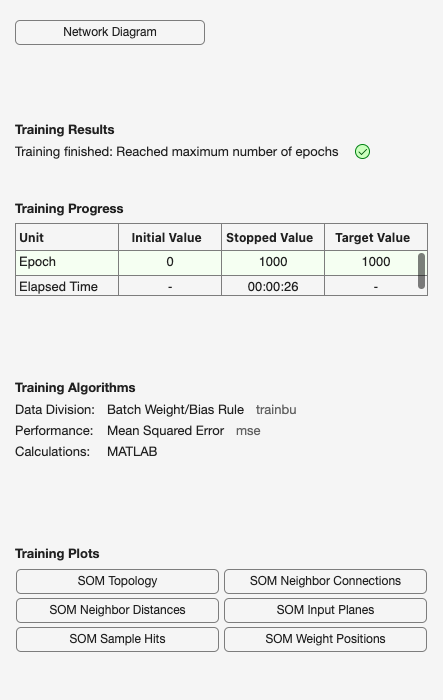

In [3]:
% transpose dataset for network
x = predictors_norm';

% grid properties
m = 30;
n = 30;

% network
net = selforgmap([m, n], topologyFcn="gridtop", distanceFcn="dist", initNeighbor=30, coverSteps=500);
net = configure(net, x);
[net, tr] = train(net, x);

In [4]:
y = net(x);

## Purging unactivated nodes


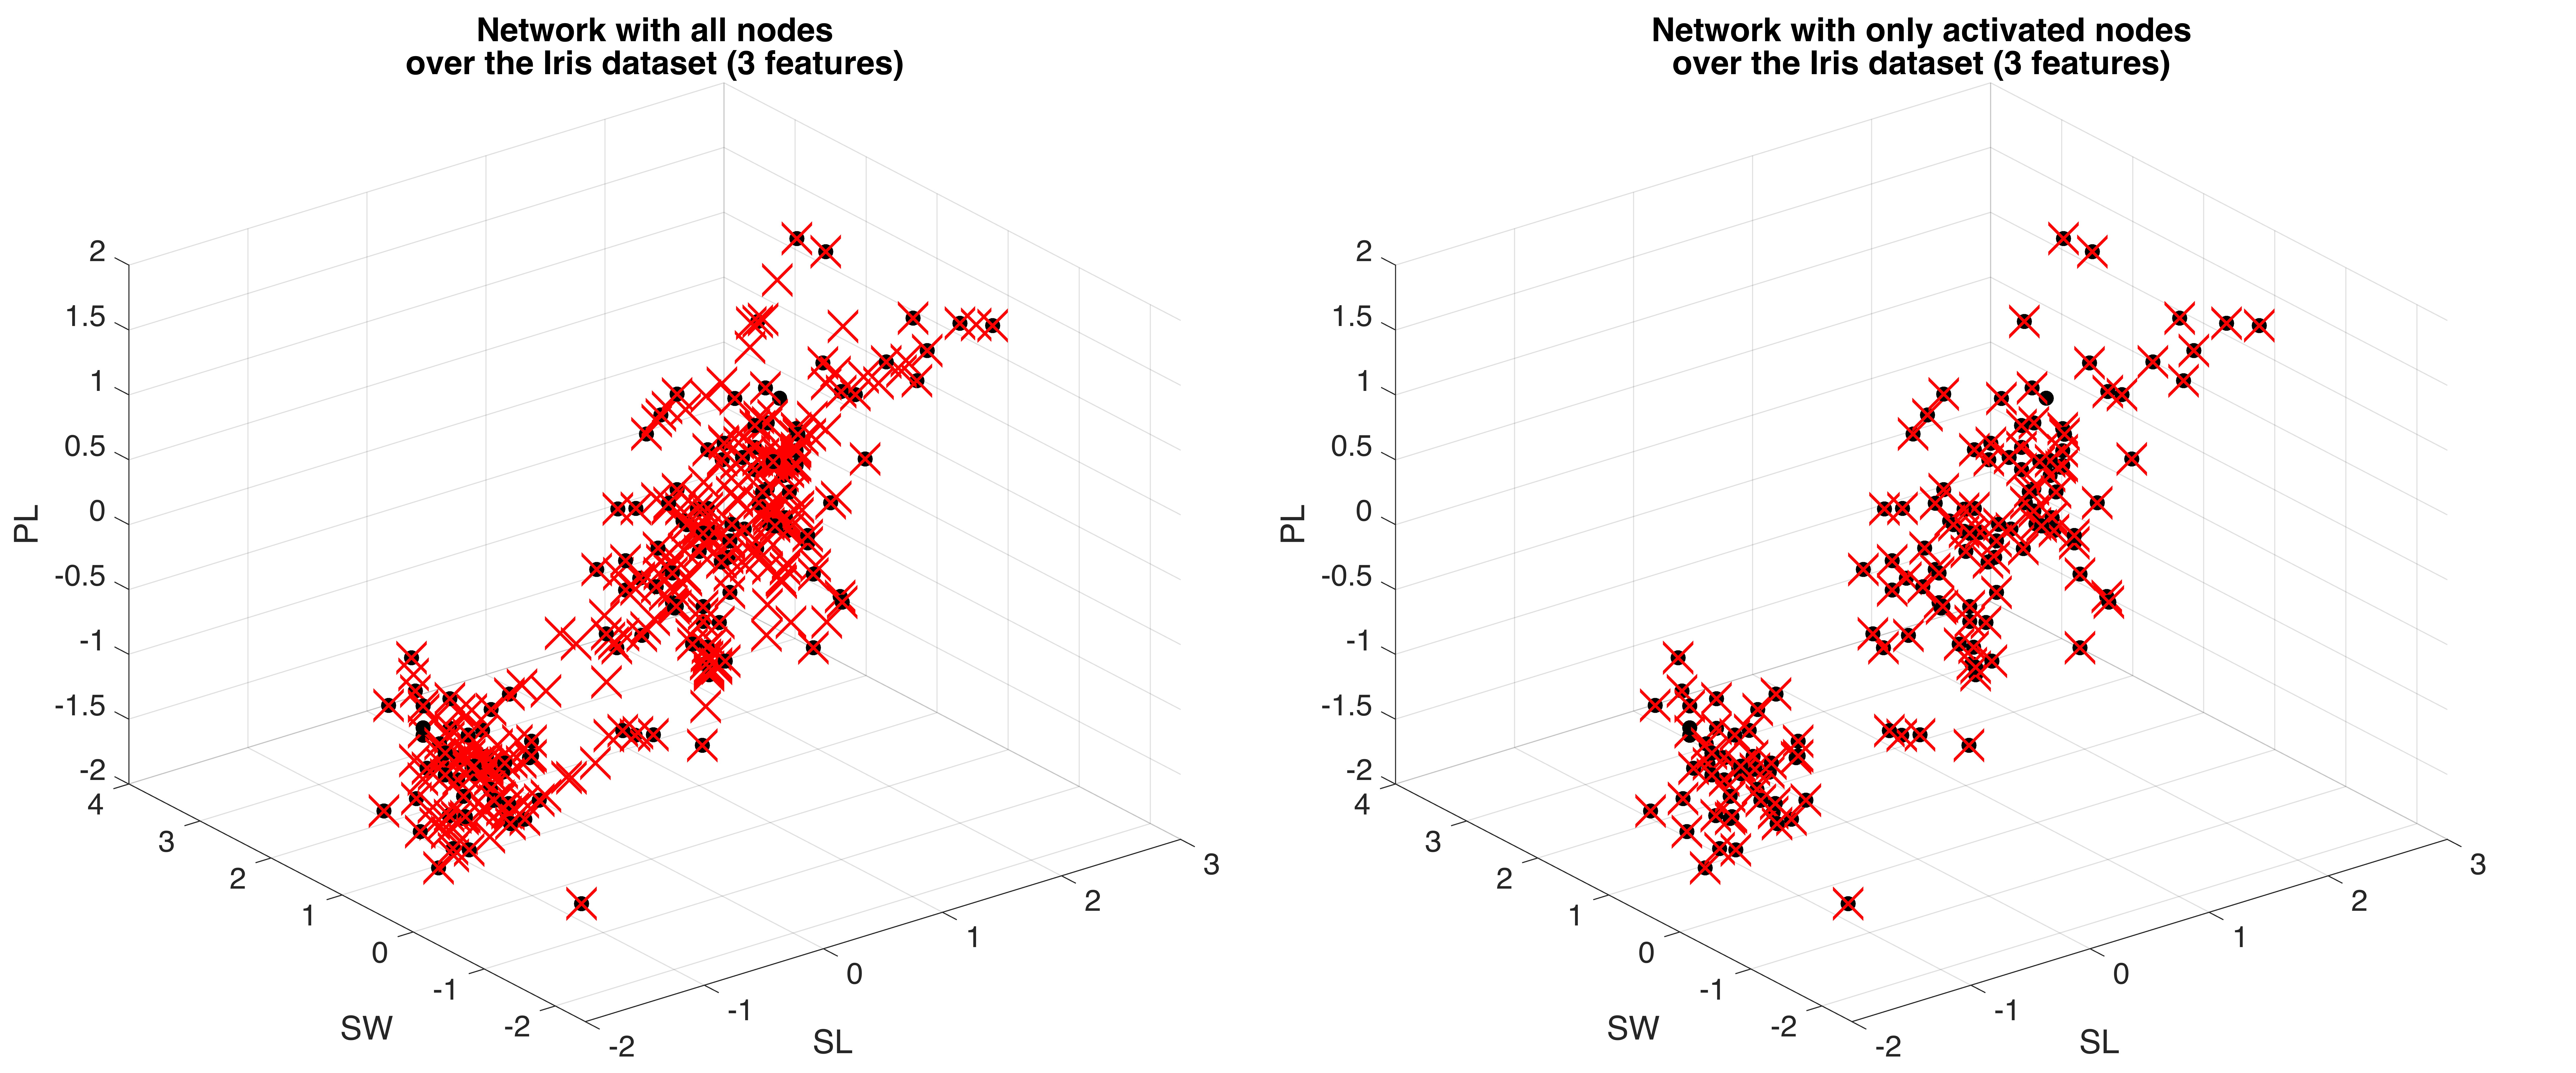

In [5]:
x1 = predictors_norm(:, 1);
x2 = predictors_norm(:, 2);
x3 = predictors_norm(:, 3);
x4 = predictors_norm(:, 4);

f = figure;
f.Position = [100 100 1200 500];
t = tiledlayout(1, 2, 'TileSpacing', 'loose', 'Padding', 'compact');

% All nodes
ax1 = nexttile;
scatter3(x1, x2, x3, 50, 'k', 'filled');

hold on;
weights = net.IW{1};
scatter3(weights(:,1), weights(:,2), weights(:,3), 400, 'rx', 'LineWidth', 2);
hold off;

xlabel(columns(1));
ylabel(columns(2));
zlabel(columns(3));
title(["Network with all nodes", "over the Iris dataset (3 features)"]);
set(gca, 'FontSize', 14);

% With only activated nodes
ax2 = nexttile;
scatter3(x1, x2, x3, 50, 'k', 'filled');

bmuIndices = vec2ind(net(x));
numNeurons = numel(net.IW{1});
hits = histcounts(bmuIndices, 1:numNeurons+1);
weights = net.IW{1};
activated_nodes = weights(hits > 0, :);

hold on;
scatter3(activated_nodes(:,1), activated_nodes(:,2), activated_nodes(:,3), 400, 'rx', 'LineWidth', 2);
hold off;

xlabel(columns(1));
ylabel(columns(2));
zlabel(columns(3));
title(["Network with only activated nodes", "over the Iris dataset (3 features)"]);
set(gca, 'FontSize', 14);